<a href="https://colab.research.google.com/github/Maagnitude/fetal_health_models/blob/main/fetal_health_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1η Εργασία** στο μάθημα **Μηχανική Μάθηση και Εφαρμογές**

# **Τμήμα Πληροφορικής και Τηλεματικής - Χαροκόπειο Πανεπιστήμιο**

# **Καζάζης Γεώργιος - it214124**

Στην παρούσα εργασία θα αναπτύξουμε **μοντέλα κατηγοριοποίησης**, για να εκτιμήσουμε την υγεία ενός εμβρύου βάσει των χαρακτηριστικών που εξάχθηκαν από εξέταση της εγκύου με καρδιοτοκογράφημα.

Πρώτα θα **διερευνήσουμε** τα δεδομένα μας, θα τα **επεξεργαστούμε**, θα **εκπαιδεύσουμε** τα μοντέλα μας και θα **εξετάσουμε** την **αποδοτικότητα** τους.

**Αρχίζοντας...**

# **Βιβλιοθήκες**
Κάνουμε import τα απαραίτητα **modules**. 
*   Την **pandas** και την **numpy** για την διαχείρηση των δεδομένων μας.

*  Την **matplotlib.pyplot** και την **seaborn** για την οπτικοποίηση των δεδομένων μας. **Ιστογράμματα**, **boxplots** κλπ.

*  Την **missingno** ώστε να οπτικοποιήσουμε το αν υπάρχουν ελλιπείς εγγραφές.

*   Από την **sklearn** κάνουμε import:
      *   Την **linear_model** για να εκπαιδεύσουμε το **Logistic Regression model**.
      *   Την **neural_network** για να υλοποιήσουμε και να εκπαιδεύσουμε ΤΝΔ.
      *  Την **StardardScaler** και την **train_test_split** για το **Preprocessing** κομμάτι. Συγκεκριμένα για την τυποποίηση των δεδομένων και για να χωρίσουμε τα δεδομένα μας σε **test data** και **train data**.
      *  Την **metrics** για τις μετρικές που θα χρησιμοποιήσουμε, όπως η **confusion_matrix**.
      *  Την **RandomForestClassifier** για να εκπαιδεύσουμε ένα Random Forest model.
*  Το **tensorflow**, και από αυτό, τα **keras** και **layers** για την ανάπτυξη νευρωνικών δικτύων.

*  Τέλος, κάνουμε import τα **warnings** και τα φιλτράρουμε, ώστε να μην εμφανίζονται.










In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import linear_model
from sklearn import neural_network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings(action='ignore')

## **read_csv**
Περνάμε το **url** του dataset στην μεταβλητή df με την χρήση της μεθόδου read_csv, και εκτυπώνουμε τις 5 πρώτες γραμμές για να δούμε ότι έγιναν όλα σωστά.

Το **url** είναι του **raw dataset** απ το repository μου στο **github**.

In [3]:
url = "https://raw.githubusercontent.com/Maagnitude/fetal_health_models/main/fetal_health.csv"
df = pd.read_csv(url)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
print("Table's shape is: ", df.shape[0], " rows x ", df.shape[1], " columns.")

Table's shape is:  2126  rows x  22  columns.


### **Drive mount** (as a second option)
Το παρακάτω block κώδικα το έχω κάνει comment γιατί θα ανεβάζω το dataset μέσω του **github url**, από το repository μου. 

Απλά μέσω του google drive έπαιρνα το dataset, πριν φτιάξω το repository, οπότε το άφησα να υπάρχει σαν επιλογή.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/Colab Notebooks/fetal_health.csv"
# df = pd.read_csv(path, keep_default_na=False)
# df.head()

# **EDA**
Παρακάτω θα διερευνήσουμε τα δεδομένα μας.

Με την **copy()** δημιουργούμε ένα αντίγραφο της **df** για να το χρησιμοποιήσουμε στην **διερεύνηση των δεδομένων** **(EDA)**, ώστε να μην πειράξουμε το αρχικό **dataframe**.

In [5]:
eda_df = df.copy()

## **Info**
Με την **info()** τυπώνουμε την συνοπτική περίληψη του dataframe. Συγκεκριμένα τυπώνουμε τον τύπο δεδομένων των στηλών και πόση μνήμη χρησιμοποιείται. Επίσης παρατηρούμε ότι δεν έχουμε missing values, καθώς όλες οι στήλες έχουν **2126** τιμές και είναι **non-null**. Το βλέπουμε και πιο καθαρά με την **isna().sum()** παρακάτω, που αφορά και τις NaN τιμές.

In [6]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
eda_df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## **Δεν υπάρχουν λοιπόν ελλιπείς εγγραφές.**
Με την χρήση της συνάρτησης **isnull()** της βιβλιοθήκης **pandas**, θα αποδείξουμε ότι **δεν υπάρχουν ελλιπείς εγγραφές**, δηλαδή ότι έχουμε ένα **πλήρες** σύνολο δεδομένων, όπως είδαμε και πιο πάνω με την **info()** αλλά και το διάγραμμα.

In [8]:
print("Are there missing values? ", "Yes" if (eda_df.isnull().values.any()) else "No")

Are there missing values?  No


## **Οπτική απόδειξη**
Με την χρήση της συνάρτησης **bar()** της βιβλιοθήκης **missingno**, βλέπουμε ότι **δεν υπάρχουν** ελλιπείς εγγραφές, καθώς οι μπάρες σε κάθε χαρακτηριστικό φτάνουν στο 1.0

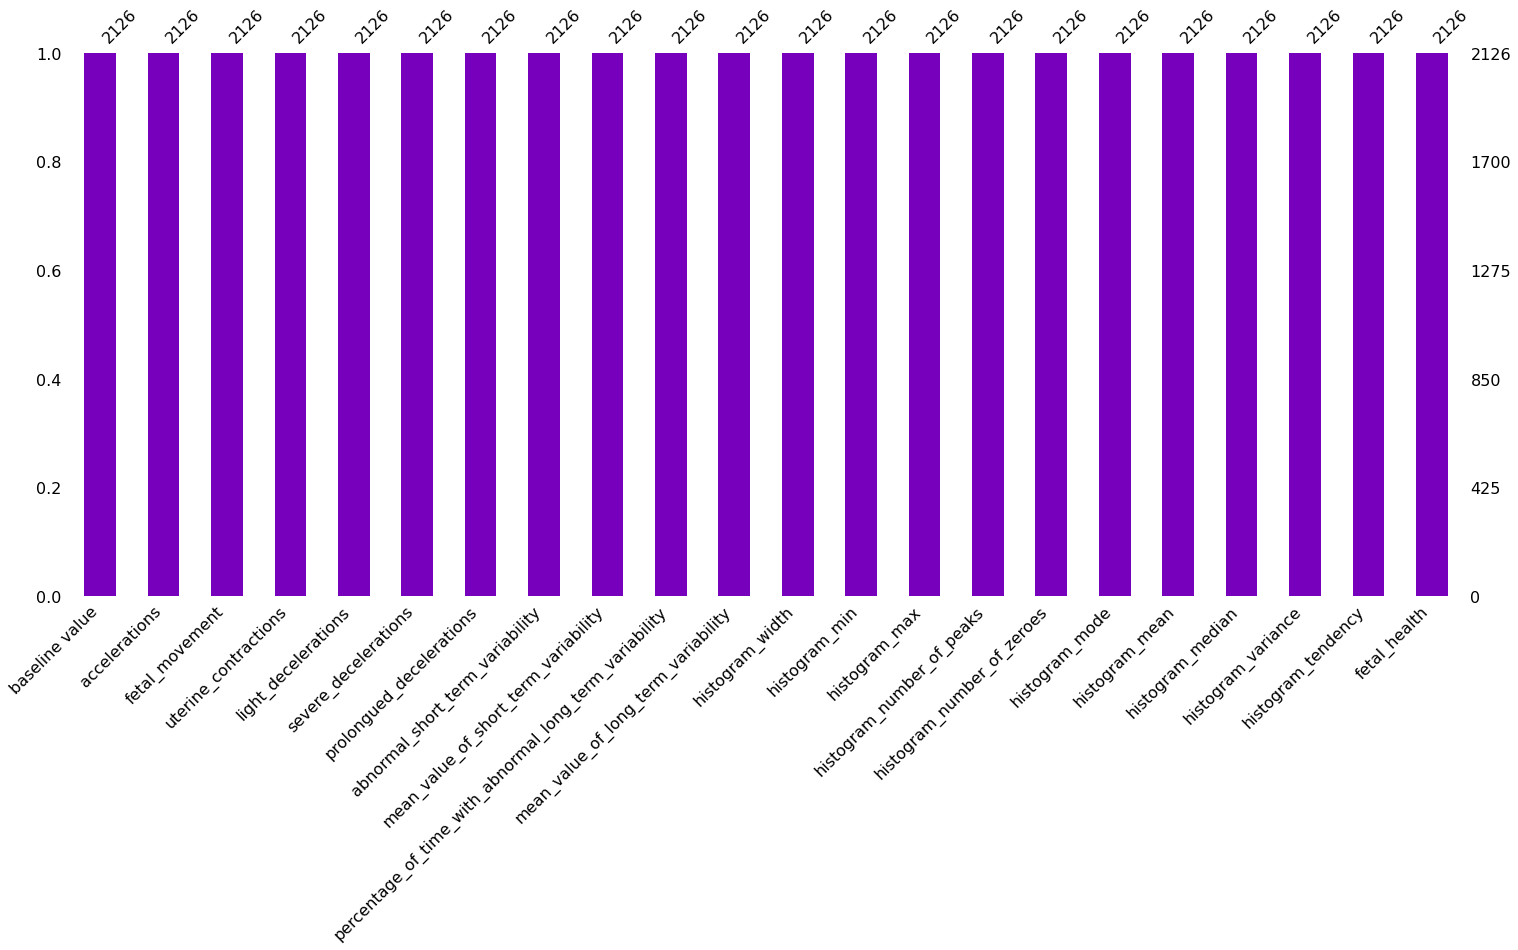

In [9]:
null_plot = msno.bar(eda_df, color="#7600BC")

## **Ιστόγραμμα**
Εδώ τυπώνουμε το **Ιστόγραμμα** κάθε χαρακτηριστικού, με την μέθοδο **hist()**, και τα καταχωρούμε στην μεταβλητή **df_histplot**. Αυτό που μπορούμε να παρατηρήσουμε εδώ είναι ότι το χαρακτηριστικό baseline_value είναι όσο πιο κοντά σε **κανονική κατανομή** σε αντίθεση με τα άλλα χαρακτηριστικά. Στα περισσότερα παρατηρείται **θετική ασυμμετρία**, και σε λίγα (κυρίως **histogram_mode**, **histogram_mean**, **histogram_median**) παρατηρείται **αρνητική ασυμμετρία**, και τα συγκεκριμένα και μεγάλη συσχέτιση μεταξύ τους, όπως θα δούμε και παρακάτω.

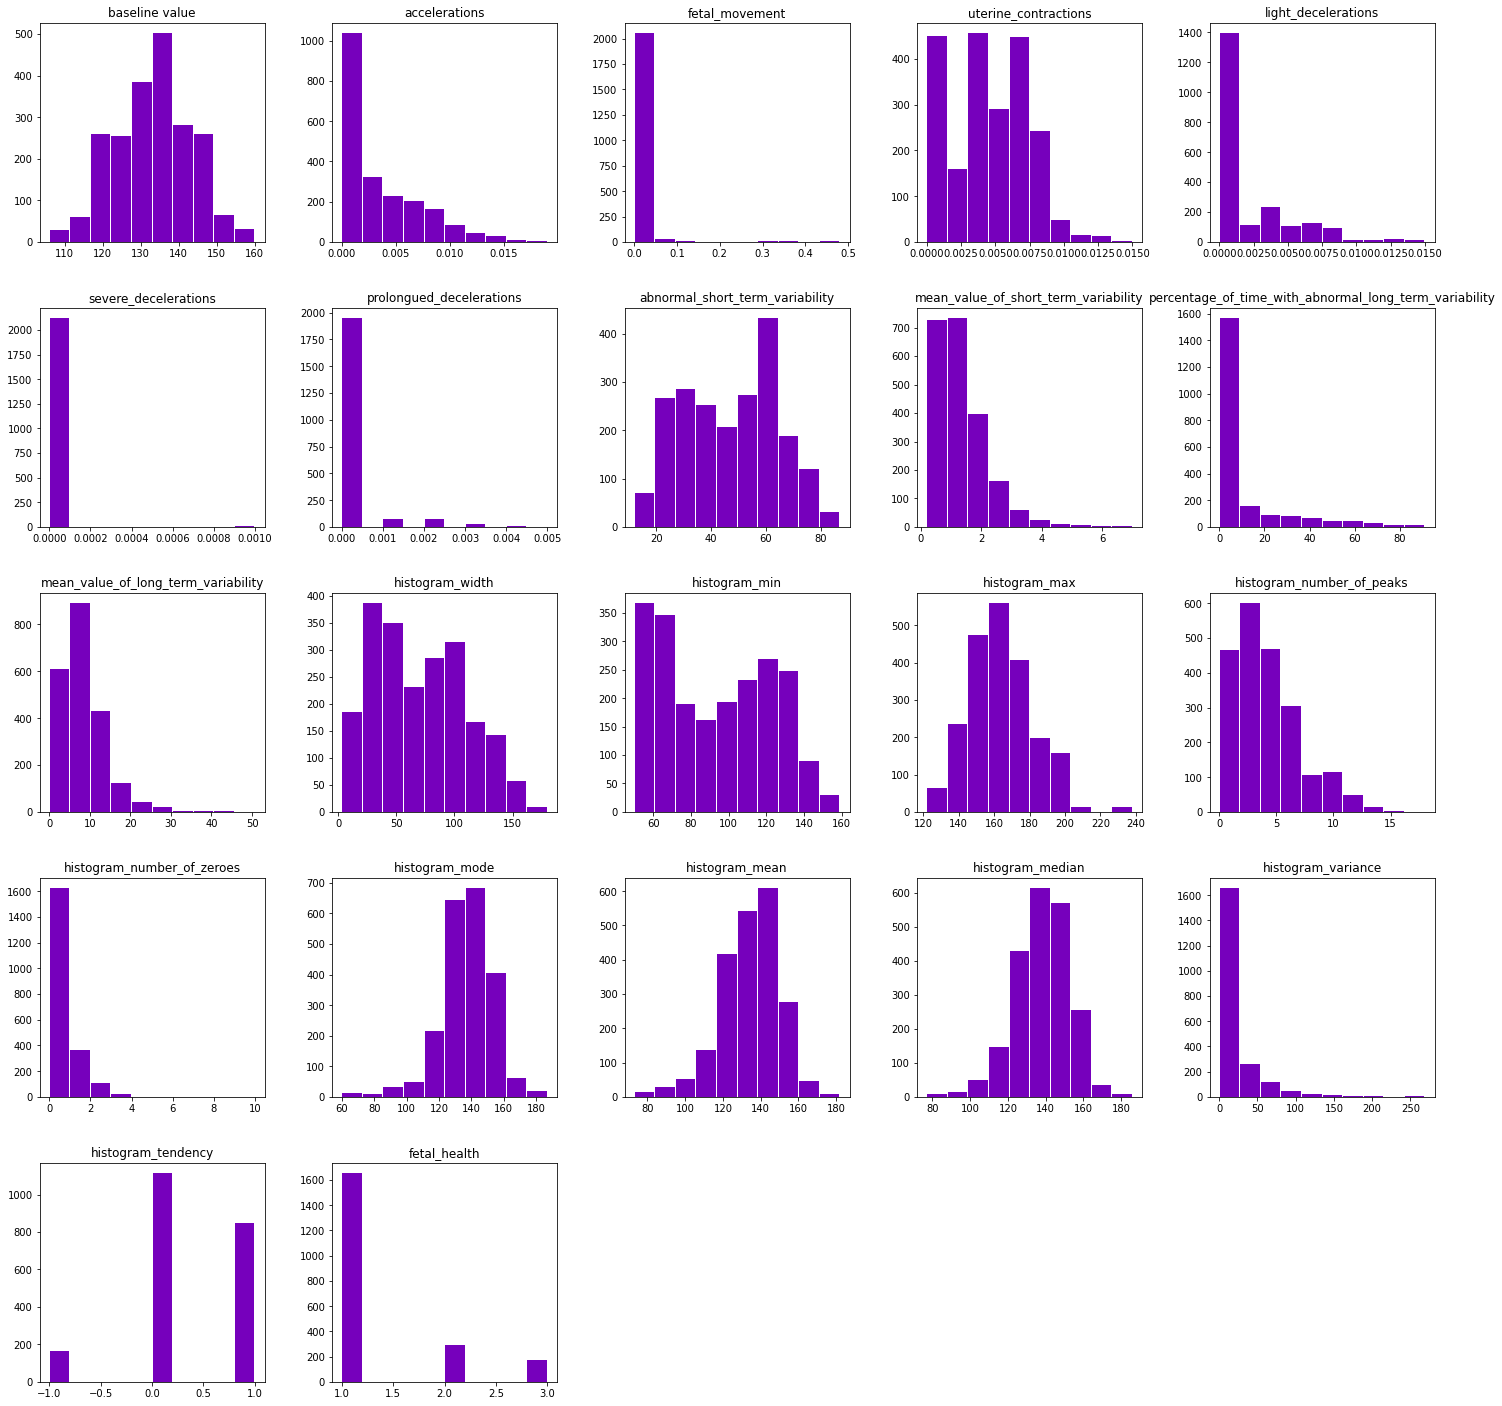

In [10]:
edadf_histplot = eda_df.hist(grid=False, figsize=(25,25), color='#7600BC', zorder=2, rwidth=0.95)

## **Describe**
Παρακάτω εμφανίζουμε την στατιστική ανάλυση των δεδομένων μας, με την χρήση της μεθόδου **describe()**. Παρατηρούμε ότι το 75% των δειγμάτων μας ανήκει στην **κατηγορία 1** του fetal_health, δηλαδή 'φυσιολογικό'. Επίσης η στατιστική ανάλυση αφορά και τις 22 στήλες, μιας και έχουμε μόνο αριθμητικά χαρακτηριστικά, κι έτσι θα είναι και πιο εύκολη η επεξεργασία των δεδομένων καθώς και η εκπαίδευση των μοντέλων μας.

Σημ: Με **Transpose (.T)** ο πίνακας είναι πιο ευκρινής. Στην αρχή τον είχα αλλιώς, και ήταν κουραστικό.

In [11]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## **Υπολογισμός**
Εδώ βλέπουμε πόσες από τις εγγραφές ανήκουν σε κάθε **κατηγορία**, (**normal**, **suspect** ή **pathological**) με χρήση της **value_counts()**

In [12]:
print(eda_df["fetal_health"].value_counts())

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


## **Category Pie Plot**
Εδώ οπτικοποιούμε τα αποτελέσματα του προηγούμενου υπολογισμού, σε ένα διάγραμμα πίτας, βάζοντας και τα ποσοστά, ώστε να δούμε πόσες εγγραφές έχουμε σε κάθε κατηγορία σε σχέση με το σύνολο.
Παρατηρούμε ότι έχουμε μεγάλο ποσοστό **Normal**, όπως είδαμε και τον υπολογισμό παραπάνω, που σημαίνει ότι το σύνολο δεδομένων **δεν είναι ισορροπημένο**, μιας και απ τις 3 κατηγορίες (classes) η πρώτη καταλαμβάνει το **77.85%**

<function matplotlib.pyplot.show(*args, **kw)>

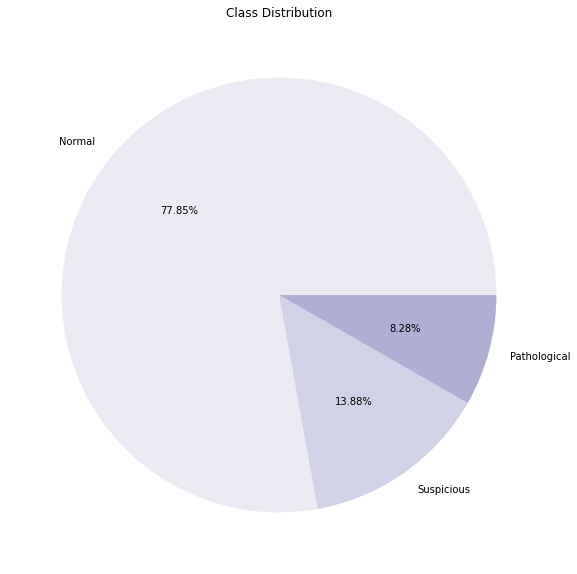

In [13]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    labels=["Normal", "Suspicious", "Pathological"],
    autopct='%.2f%%',
    colors=sns.color_palette('Purples')
)

plt.title("Class Distribution")
plt.show

##**Boxplot**

Ύστερα τυπώνουμε το **boxplot** κάθε χαρακτηριστικού με τη χρήση της συνάρτησης **boxplot()** της βιβλιοθήκης **seaborn**. Παρατηρούμε ότι έχουμε μια σωστή οπτικοποίηση της στατιστικής ανάλυσης που κάναμε παραπάνω μιας και σ ένα θηκόγραμμα μπορούμε να διαβάσουμε 5 τιμές. Τέρμα πάνω έχουμε τη μέγιστη τιμή, και τέρμα κάτω την ελάχιστη. Στην πάνω πλευρά του 'κουτιού' βρίσκεται το 75% των δειγμάτων, στην κάτω πλευρά το 25% και στην γραμμή που βρίσκεται εντός του κουτιού έχουμε το 50%. Πολύ σωστά λοιπόν η γραμμή αυτή στο fetal_health, βρίσκεται πάνω στην τιμή 1, και δεν υπάρχει κουτί μιας και το 75% των δειγμάτων παρουσιάζουν fetal_health ίσο με 1.

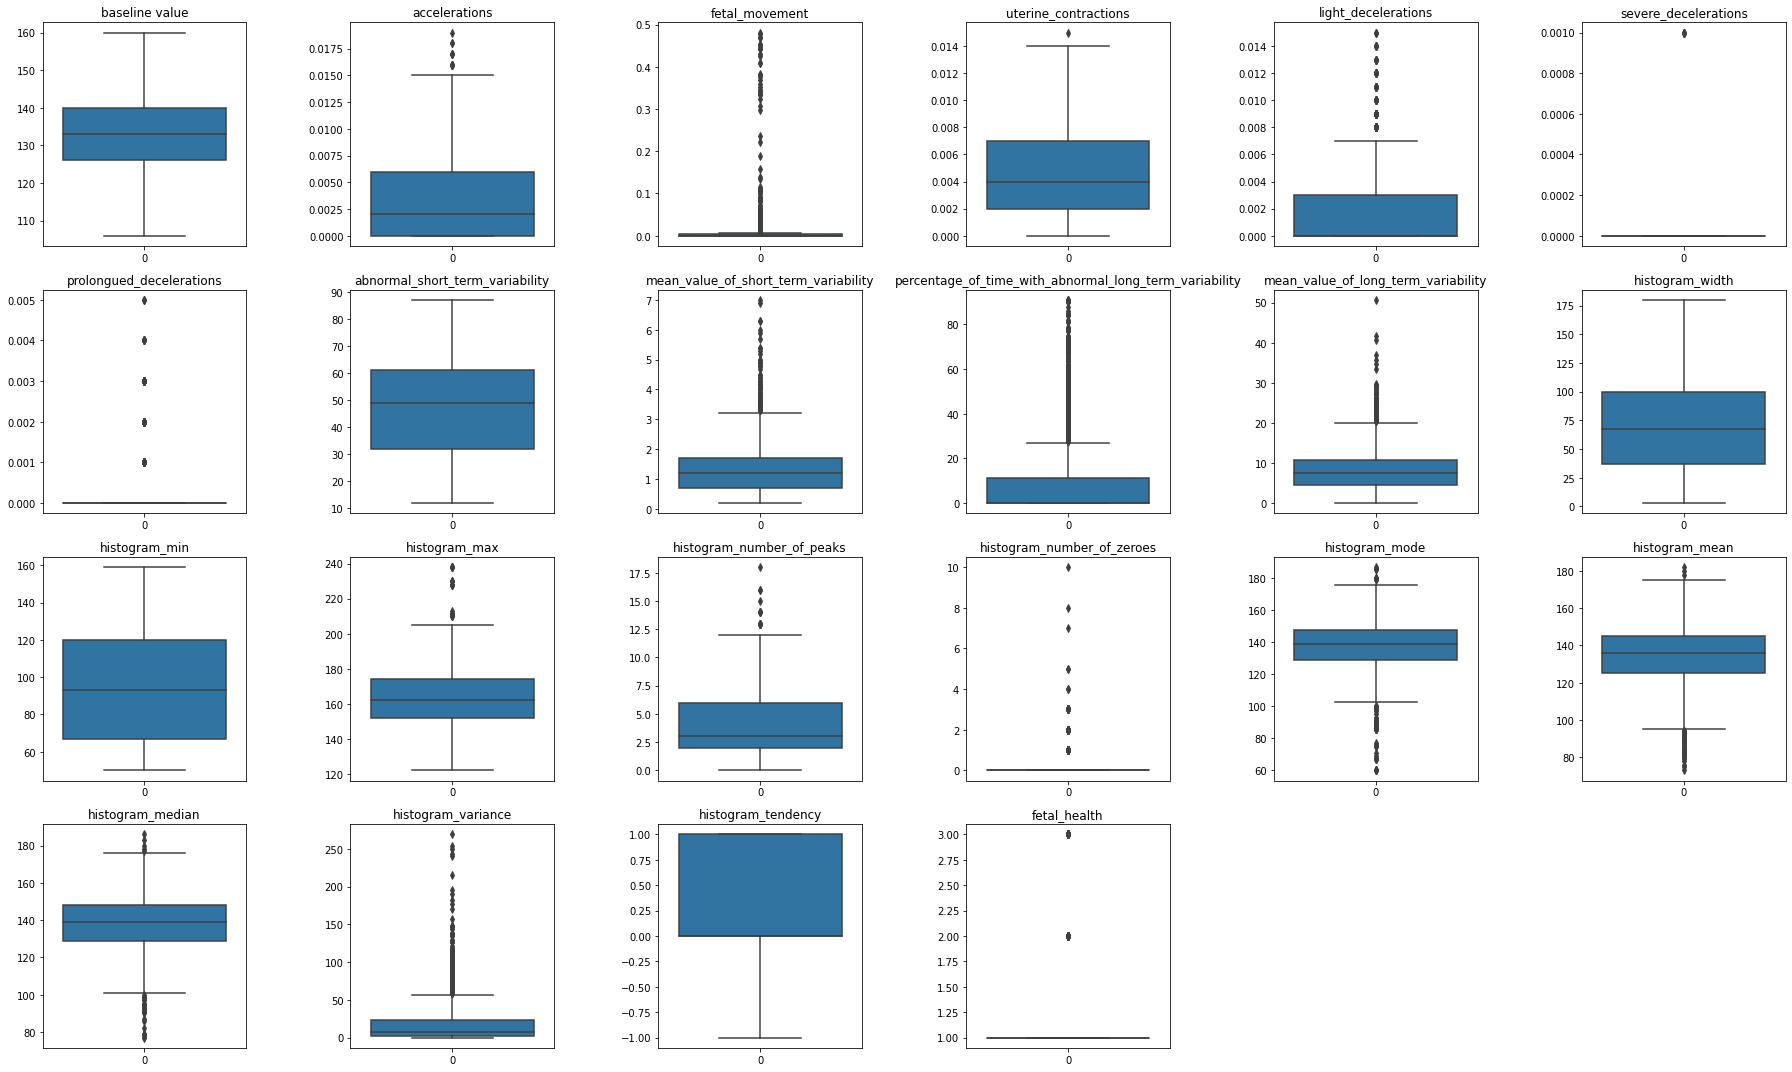

In [14]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
  plt.subplot(4, 6, i + 1)
  sns.boxplot(data=eda_df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

## **Ετεροσυσχέτιση**
Με την χρήση της συνάρτησης **corr()** της βιβλιοθήκης **pandas**, ελέγχουμε την **ετεροσυσχέτιση** μεταξύ των χαρακτηριστικών. Συγκεκριμένα τυπώνουμε την συσχέτιση όλων των χαρακτηριστικών με το fetal_health, και παρακάτω θα οπτικοποιήσουμε τις συσχετίσεις όλων.

In [15]:
corr = eda_df.corr()
corr['fetal_health']

baseline value                                            0.148151
accelerations                                            -0.364066
fetal_movement                                            0.088010
uterine_contractions                                     -0.204894
light_decelerations                                       0.058870
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_width                                          -0.068789
histogram_min                                             0.063175
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.02

## **Heatmap**
Εδώ οπτικοποιούμε την **ετεροσυσχέτιση** των χαρακτηριστικών. Αυτή η δισδιάστατη αναπαράσταση μας βοηθάει να καταλάβουμε πολύ πιο εύκολα την ετεροσυσχέτιση, μέσω των χρωμάτων, αλλά και των τιμών. Παρατηρούμε ότι μεγαλύτερη συσχέτιση με το **fetal health** έχει το **prolonged decelerations** (**0.48**)

Παρατηρούμε και αυτό που είδαμε πιο πάνω. Ότι τα χαρακτηριστικά histogram_mode, histogram_mean, histogram_median έχουν τεράστια συσχέτιση μεταξύ τους, αλλά πολύ μικρή ετεροσυσχέτιση με το fetal_health (-0.21, -0.23, -0.25), και επειδή ήταν και αυτά που έχουν αρνητική ασσυμετρία, θα δοκιμάσω να τα αφαιρέσω για να δούμε αν το μοντέλο εκπαιδευτεί καλύτερα.

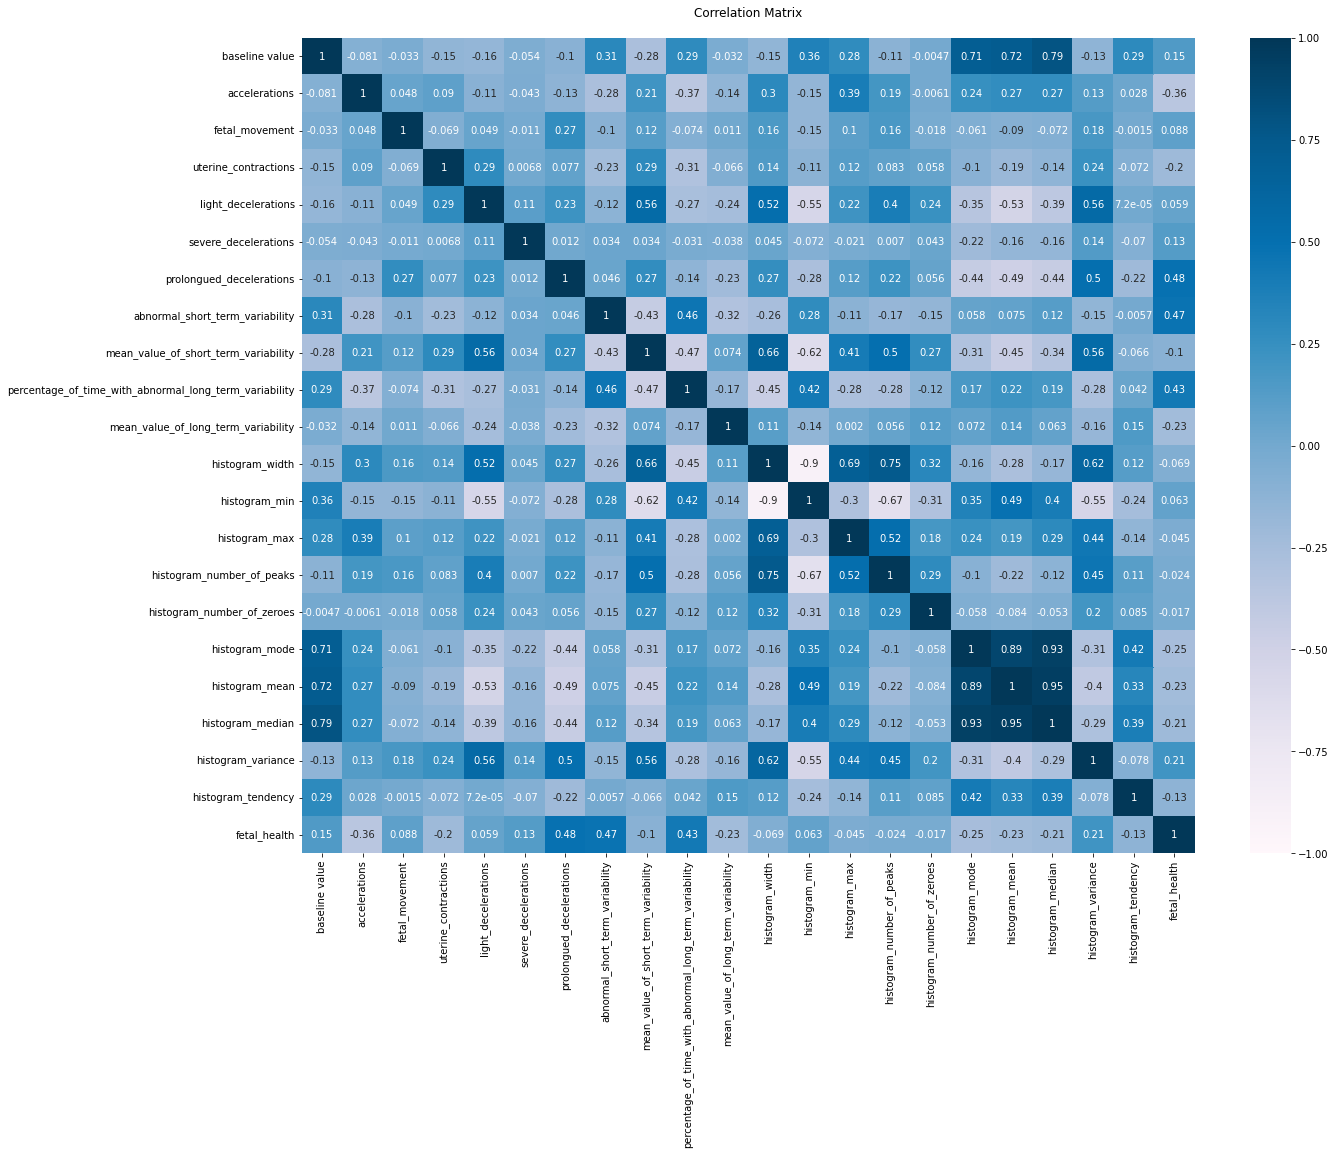

In [16]:
plt.figure(figsize=(20,15))
heat = sns.heatmap(corr, annot=True, vmin=-1.0, cmap='PuBu')
plt.title("Correlation Matrix\n")
plt.show()

# **2.1-2.2 Υλοποίηση συνάρτησης για preprocessing**

Εντός αυτής, χωρίζουμε τα δεδομένα σε **train** και **test sets**, μέσω της **train_test_split** με **70% train** και **30% test**, και **random_state 42**. Ύστερα τα κάνουμε scale με τον **StandardScaler()** στα X_train και X_test με αποτέλεσμα οι τιμές κάθε χαρακτηριστικού να τυποποιούνται με κέντρο 0 και τυπική απόκλιση 1.

In [17]:
def preprocessing_func(fitdf):

  # Χωρίζουμε το fitdf σε X (features) και y (labels)
  y = fitdf['fetal_health']
  X = fitdf.drop('fetal_health', axis=1)

  # Χωρίζουμε τα X και y σε train και test set (70%-30%) με random_state=42
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.7, random_state=42)

  # Τυποποιούμε τα X_train και X_test
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_std = scaler.transform(X_train)
  X_test_std = scaler.transform(X_test)

  return X_train_std, X_test_std, y_train, y_test

# **2.3.1 Υλοποίηση συνάρτησης για την εκπαίδευση γραμμικού μοντέλου**

Θα την χρησιμοποιήσουμε δίνοντας της τα χωρισμένα **train** και **test sets**, ώστε να εκπαιδευτεί (**fit**) στα train και ύστερα να εξεταστεί (**metrics.accuracy_score**) στο test, σύμφωνα με τα label που πρόβλεψε (**y_hat_test**), ώστε να πάρουμε το **accuracy**. Με την **predict** θα πάρουμε όλες τις τιμές που πρόβλεψε ώστε να φτιάξουμε τον **confusion matrix**. 

Στο μοντέλο αφήσαμε το **default penalty** (**l2**) και απλά βάλαμε την παράμεντρο **C=0.1** με την οποία παρατηρήθηκε αύξηση στο accuracy.

In [19]:
def run_linear_sklearn(X_train, X_test, y_train, y_test):

  # Εκπαίδευση μοντέλου
  lr = linear_model.LogisticRegression(C=0.1)
  model = lr.fit(X_train, y_train)

  # Τεστάρισμα μοντέλου
  y_hat_test = model.predict(X_test)
  accuracy = round(metrics.accuracy_score(y_test, y_hat_test), 3)

  # Υπολογισμός του confusion matrix
  confmatrix = confusion_matrix(y_test, y_hat_test)

  return accuracy, confmatrix

## **Υλοποίηση συνάρτησης για τον σχεδιασμό του Confusion Matrix**

Με χρήση ενός heatmap θα παρουσιάσουμε τα αποτελέσματα του υπολογισμένου confusion matrix, όπου βάζουμε τις παραμέτρους annot=True και annot_kws={'size':20} για να εμφανίσουμε τις τιμές σε κάθε περιοχή του πίνακα, και να έχουν μέγεθος 20. Επίσης, η παράμετρος **fmt="d"** είναι για να εμφανίζονται οι τιμές ως ακέραιοι. (Γιατί χωρίς αυτήν, το 466 εμφανιζόταν ως 4.7e+02)

Τέλος, με την **axis.tick_top()** βάζουμε τα labels του άξονα x στην κορυφή του plot.

In [20]:
def heat_confmatrix (confmatrix):
  
  labels = ['Normal', 'Suspicious', 'Pathological']

  # Δίνουμε τα labels στον πίνακα
  conf_matr_plt = pd.DataFrame(confmatrix, index = labels, columns = labels)
  
  plt.subplots(figsize=(7, 5))
  
  ax = sns.heatmap(conf_matr_plt, cmap='viridis', annot=True, annot_kws={'size':20}, fmt="d")

  ax.xaxis.tick_top()
  ax.set_title("Confusion Matrix\n")
  plt.ylabel('True')
  plt.xlabel('Predicted')
  plt.show()

## **Δημιουργία αντίγραφου του Dataframe μας**

Πρώτα αφαιρούμε 1 από κάθε label ώστε να μειώσουμε το σύνολο τιμών και να τις κάνουμε να ξεκινάνε απ το 0, ώστε να μην έχουμε πρόβλημα στο one-hot encoding και τον υπολογισμό του confusion matrix (μιας και πριν συμπλήρωνε μία γραμμή και στήλη με μηδενικά).

Ύστερα φτιάχνουμε το **fitdf**, ώστε να μην πειράξουμε το αρχικό dataframe μας. Όλες οι αλλαγές θα γίνουν πάνω σ αυτό.

In [21]:
# labels (1, 2, 3) --> (0, 1, 2) 
df['fetal_health'] -= 1
# Να μην εκτελεστεί πάνω από μία φορά. Αν εκτελεστεί, δεν πρέπει να τρέξουμε πάλι
# την εντολή από κάτω, γιατί το αντίγραφο θα έχει αρνητικές τιμές, μιας και το ένα
# label, από 0 θα γίνει -1.

In [157]:
fitdf = df.copy()

In [23]:
fitdf.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0


Τώρα θα τρέξουμε τις συναρτήσεις που υλοποιήσαμε για το **standarization** και **split** των datasets, καθώς και το **fit** και **predict** του μοντέλου.

In [158]:
X_train, X_test, y_train, y_test = preprocessing_func(fitdf)

In [159]:
accuracy, confmatrix = run_linear_sklearn(X_train, X_test, y_train, y_test)

## **Accuracy: 0.895**

Αρχικά είχα εκπαιδεύσει και ένα μοντέλο, **χωρίς** την χρήση του StandardScaler και της παραμέτρου C=0.1, για δοκιμή και είχε **accuracy 0.85** (Το κομμάτι αφαιρέθηκε για να μειωθεί η έκταση του notebook)

Εδώ το accuracy είναι **0.895** και θα προσπαθήσουμε να το αυξήσουμε λίγο.

Model's accuracy: 0.8950



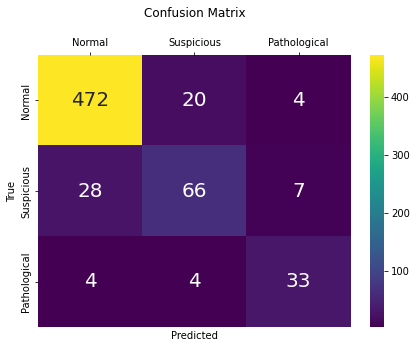

In [160]:
print(f"Model's accuracy: {accuracy:.4f}\n")
heat_confmatrix(confmatrix)

## **Παρατηρήσεις πάνω στο Confusion Matrix**

Μόνο σ αυτό το confusion matrix θα αναλύσουμε τι παρατηρούμε.

* Όταν το μοντέλο προέβλεψε **normal**, τα 472 ήταν όντως normal, τα 28 όμως ήταν suspicious και τα υπόλοιπα 4 ήταν pathological.

* Όταν προέβλεψε **suspicious**, τα 66 ήταν όντως suspicious,όμως τα 20 ήταν normal και τα υπόλοιπα 4 pathological.

* Όταν προέβλεψε **pathological**, τα 33 ήταν όντως pathological, όμως τα 4 ήταν normal και τα υπόλοιπα 7 ήταν suspicious.

Συνολικά έπεσε μέσα σε 472 + 66 + 33 = **571** προβλέψεις, από τις συνολικές **638**, δίνοντας μας το accuracy 571 / 638 = **89.5%**



## **Τώρα μια δοκιμή**

Αν θεωρήσουμε τους '**ύποπτους για παθολογία**' και τους '**παθολογικούς**' ως μία κατηγορία, μειώνοντας τις κλάσεις μας σε 2, τότε με τον παρακάτω κώδικα κάνουμε το χαρακτηριστικό αυτό να είναι ή 0 ή 1, με χρήση ενός **list comprehension**.

In [161]:
fitdf['fetal_health'].value_counts()

0.0    1655
1.0     295
2.0     176
Name: fetal_health, dtype: int64

In [162]:
fitdf['fetal_health'] = [1 if x == 2.0 or x == 1.0 else 0 for x in fitdf['fetal_health']]
fitdf['fetal_health'].value_counts()

0    1655
1     471
Name: fetal_health, dtype: int64

Όπως βλέπουμε παραπάνω, οι τιμές μοιράστηκαν. Έτσι το σύνολο δεδομένων μας είναι **λίγο** περισσότερο ισορροπημένο.

## **Accuracy: 0.909 αλλά...**

In [166]:
X_train, X_test, y_train, y_test = preprocessing_func(fitdf)
accuracy, confmatrix = run_linear_sklearn(X_train, X_test, y_train, y_test)
print(f"Model's accuracy after merging: {accuracy:.4f}\n")
print(f'Confusion matrix after merging:\n {confmatrix}')

Model's accuracy after merging: 0.9090

Confusion matrix after merging:
 [[467  29]
 [ 29 113]]


Ίσως δεν είναι απόλυτα σωστό να ενώσουμε τις δύο κατηγορίες (2 και 3) και δεν μας αύξησαν και ιδιαίτερα το accuracy (ιδίως απ τη στιγμή που δεν βρίσκουν καν ακριβώς αυτό που θέλουμε), οπότε θα ξεκινήσουμε πάλι με αντίγραφο του αρχικού dataset και θα επεξεργαστούμε λίγο τα δεδομένα μας, ώστε να πετύχουμε κάτι πάνω απ το 0.909 που πετύχαμε ακριβώς από πάνω.

## **Μια δεύτερη δοκιμή**
Αυτό που θα μας ανεβάσει κι άλλο το **accuracy** θα είναι να πετάξουμε τυχόν **διπλότυπα**, μιας και αυτά είναι περιττά για την εκπαίδευση και το μόνο που πετυχαίνουν είναι να **υπερεκπαιδεύσουν** το μοντέλο μας.

Επίσης θα δοκιμάσουμε να αφαιρέσουμε και τα χαρακτηριστικά **histogram_mean**, **histogram_mode** και **histogram_median** όπως αναφέραμε πιο πάνω.

In [167]:
fitdf = df.copy()

In [216]:
fitdf.shape

(2126, 22)

In [217]:
# final_df = fitdf.drop(['histogram_mean', 'histogram_mode', 'histogram_median'], axis = 1)
final_df = fitdf.drop_duplicates()
final_df.shape

(2113, 22)

## **Accuracy: 0.9180**
Παρατηρούμε ότι αφαιρώντας **13 διπλότυπα δείγματα**, το accuracy ανέβηκε στο **0.9180**, το οποίο είναι ικανοποιητικό. (Το τελικό dataframe το βάλαμε στο **final_df**.)

Αφαιρώντας τα τρία χαρακτηριστικά που ανέφερα πήγε στο 0.9200, αλλά αποφάσισα να μην το κάνω έτσι οπότε θα τα κρατήσουμε, κι ας είναι μικρότερο το accuracy. Έτσι κι αλλιώς το 0.02 δεν είναι και σημαντική βελτίωση.

Model's accuracy after merging and dupl_dropping: 0.9180



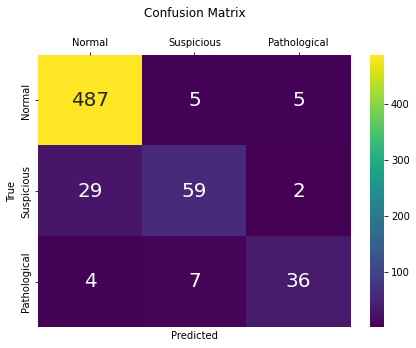

In [218]:
X_train, X_test, y_train, y_test = preprocessing_func(final_df)
accuracy, confmatrix = run_linear_sklearn(X_train, X_test, y_train, y_test)
print(f"Model's accuracy after merging and dupl_dropping: {accuracy:.4f}\n")
heat_confmatrix(confmatrix)

# **2.3.2 Tensorflow**
Δημιουργία συνάρτησης για την εκπαιδεύση νέου γραμμικού μοντέλου με tensorflow.

Το φτιάξαμε με ένα layer, το οποίο έχει 3 νευρώνες και δέχεται ένας διάνυσμα 21 χαρακτηριστικών (**X_train.shape[1],**). Θα έχουμε 3 εξόδους (μία για κάθε label, από κάθε νευρώνα) και οι τιμές τους θα αθροίζουν στο 1, λόγω του ότι έχει activation function την **softmax**. (δηλ. ποσοστό σιγουριάς του μοντέλου για το ποιο label είναι πιθανότερο να είναι σωστό)

Στο μοντέλο χρησιμοποιούμε **sparse_categorical_crossentropy** γιατί δεν έχουμε κάνει **one-hot encoding** στα labels και τα έχουμε σαν **integers**. (Αν βάζαμε ή **relu** ή **sigmoid** δεν θα ήταν πλέον γραμμικό το μοντέλο.)

Επίσης χρησιμοποιούμε **SGD optimizer** με προεπιλεγμένο **batch size** και **learning rate**, και το εκπαιδεύουμε για 50 εποχές.

In [34]:
def run_linear_tf(X_train, X_test, y_train, y_test):
  
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],))
  ])

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
  )
  model.summary()

  history = model.fit(X_train, y_train, epochs=50)
  accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  tf_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx, num_classes=3)

  return accuracy, tf_confmatrix

In [219]:
accuracy, tf_confmatrix = run_linear_tf(X_train, X_test, y_train, y_test)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 3)                 66        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 [==============================] - 0s 2ms/step - loss: 1.3081 - accuracy: 0.3414
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 1.0145 - accuracy: 0.5098
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.6613
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.7600
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.8026
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.83

Με το απλό αυτό γραμμικό μοντέλο έχουμε **accuracy 0.90**

Παρόλο που κατά την αύξηση του σε κάθε εποχή, έφτασε το **~0.885** με loss **~0.29** (στην **50η εποχή**), στο **test set** πέτυχε **~0.90** με loss **~0.25**

Δηλαδή σε κάθε φορά που το έτρεξα, στο test set πέτυχε καλύτερα αποτελέσματα.

In [174]:
print(f'Test loss: {accuracy[0]:.4f}')
print(f'Test accuracy: {accuracy[1]:.4f}')

Test loss: 0.2569
Test accuracy: 0.9006


## **Κάνουμε plot σε heatmap το νέο confusion matrix.**

Σημ: Βρήκα μετά από αρκετό ψάξιμο, ότι για να το κάνουμε plot χρειάζεται η συνάρτηση **numpy()**, γιατί αλλιώς μου έβγαζε το σφάλμα "**Cannot convert 3.0 to EagerTensor of dtype int32**"

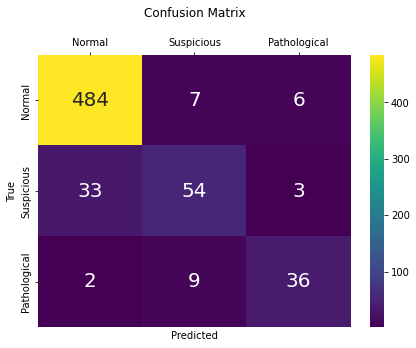

In [37]:
heat_confmatrix(tf_confmatrix.numpy())

Και τώρα θα δοκιμάσουμε στα αρχικά δεδομένα (πριν την τυποποίηση) για να συγκρίνουμε.

In [175]:
orig_df = df.copy()

In [39]:
def run_without_standard(orig_df):
  
  # Χωρίζουμε το fitdf σε X (features) και y (labels)
  y = orig_df['fetal_health']
  X = orig_df.drop('fetal_health', axis=1)

  # Χωρίζουμε τα X και y σε train και test set (70%-30%) με random_state=42
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.7, random_state=42)

  return X_train, X_test, y_train, y_test

In [244]:
X_train, X_test, y_train, y_test = run_without_standard(orig_df)
accuracy, tf_confmatrix = run_linear_tf(X_train, X_test, y_train, y_test)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 3)                 66        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 [==============================] - 1s 3ms/step - loss: 141.5939 - accuracy: 0.6626
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 111.5189 - accuracy: 0.6828
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 75.1924 - accuracy: 0.7392
Epoch 4/50
47/47 [==============================] - 0s 6ms/step - loss: 73.0554 - accuracy: 0.7453
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 49.8962 - accuracy: 0.7587
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 71.0660 - accura

Παρατηρούμε λοιπόν, ότι το accuracy ανεβοκατέβαινε συνεχώς, κατά την διάρκεια της εκπαίδευσης, σε τιμές γύρω απ το 0.80, σαν να μην υπήρχε βελτίωση σε κάθε εποχή και το αποτέλεσμα είναι απρόβλεπτο. Το τελικό test_accuracy ήταν 0.807 τη μία φορά, 0.70 την άλλη.

Επίσης το test loss ηταν πολύ μεγάλο και απρόβλεπτο επίσης (ανεβοκατέβαινε κι αυτό). Το τελικό test loss, τη μία ήταν 24 και την άλλη 137.

In [245]:
print(f'Test loss: {accuracy[0]:.4f}')
print(f'Test accuracy: {accuracy[1]:.4f}')

Test loss: 92.0078
Test accuracy: 0.8103


Έτσι και το confusion matrix έχει απρόβλεπτη συμπεριφορά. Τις περισσότερες φορές που το έτρεξα είχε μηδενικές τιμές σε όλη τη στήλη του suspicious predicted.

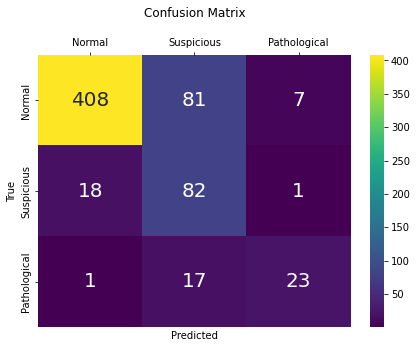

In [42]:
heat_confmatrix(tf_confmatrix.numpy())

# **2.4 Πειραματισμός για ανάπτυξη μοντέλου νευρωνικού δικτύου**

Παρακάτω υπάρχει ένας πίνακας με τους 'πειραματισμούς' που έκανα. Δυστυχώς δεν έκανα πολλά πράγματα, αλλά γενικά παρατηρούμε ότι όσα περισσότερα έβαζα (**>3 hidden layers**, **>100 neurons**, πήγαινε σχετικά **χειρότερα** η εκπαίδευση. 

Το μεγαλύτερο accuracy (**0.9527**), εμφανίστηκε στην τελευταία γραμμή του πίνακα, με **2 hidden layer**, **100 neurons** το καθένα, **Adam optimizer**, **learning rate schedule** (**0.01-0.001-0.0001**), **100 εποχές** και **batch size 128**.

Αυτό συμβαίνει όπως λέει και η **εκφώνηση** επειδή ένα σύνθετο νευρωνικό δίκτυο εύκολα **υπερεκπαιδεύεται** και δεν πετυχαίνει καλά αποτελέσματα σε ένα σχετικά μικρό σύνολο δεδομένων.

Σημ: Ο scheduler φτιάχτηκε σαν callback γιατί μου φάνηκε πιο εύκολο όταν το έψαξα και το βρήκα έτσι. Δεν ξέρω αν είναι απόλυτα σωστό.

In [43]:
X_train, X_test, y_train, y_test = preprocessing_func(final_df)

In [227]:
def experimodel(X_train, X_test, y_train, y_test):

  model = keras.Sequential([
      layers.Input(shape=(X_train.shape[1],), name='input'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(3, activation='softmax', name='output')      
  ])

  def lr_schedule(epoch):
    if epoch < 60:
      return 0.01
    elif epoch < 80:
      return 0.001
    else:
      return 0.0001

  lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )
  model.summary()

  history = model.fit(X_train, y_train, epochs=100, batch_size = 128, callbacks=[lr_scheduler])
  accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  exp_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx)

  return accuracy, exp_confmatrix

In [236]:
accuracy, exp_confmatrix = experimodel(X_train, X_test, y_train, y_test)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 100)               2200      
                                                                 
 dense_152 (Dense)           (None, 100)               10100     
                                                                 
 output (Dense)              (None, 3)                 303       
                                                                 
Total params: 12,603
Trainable params: 12,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.8087 - lr: 0.0100
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 0.8790 - lr: 0.0100
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2382 - accurac

Test loss: 0.2804
Test accuracy: 0.9527



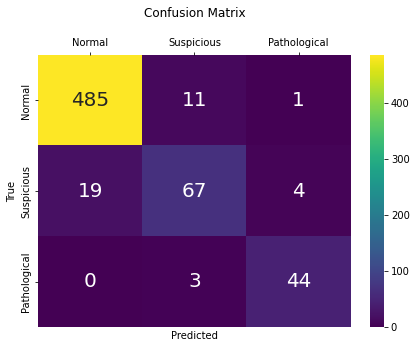

In [229]:
print(f'Test loss: {accuracy[0]:.4f}')
print(f'Test accuracy: {accuracy[1]:.4f}\n')
heat_confmatrix(tf_confmatrix.numpy())

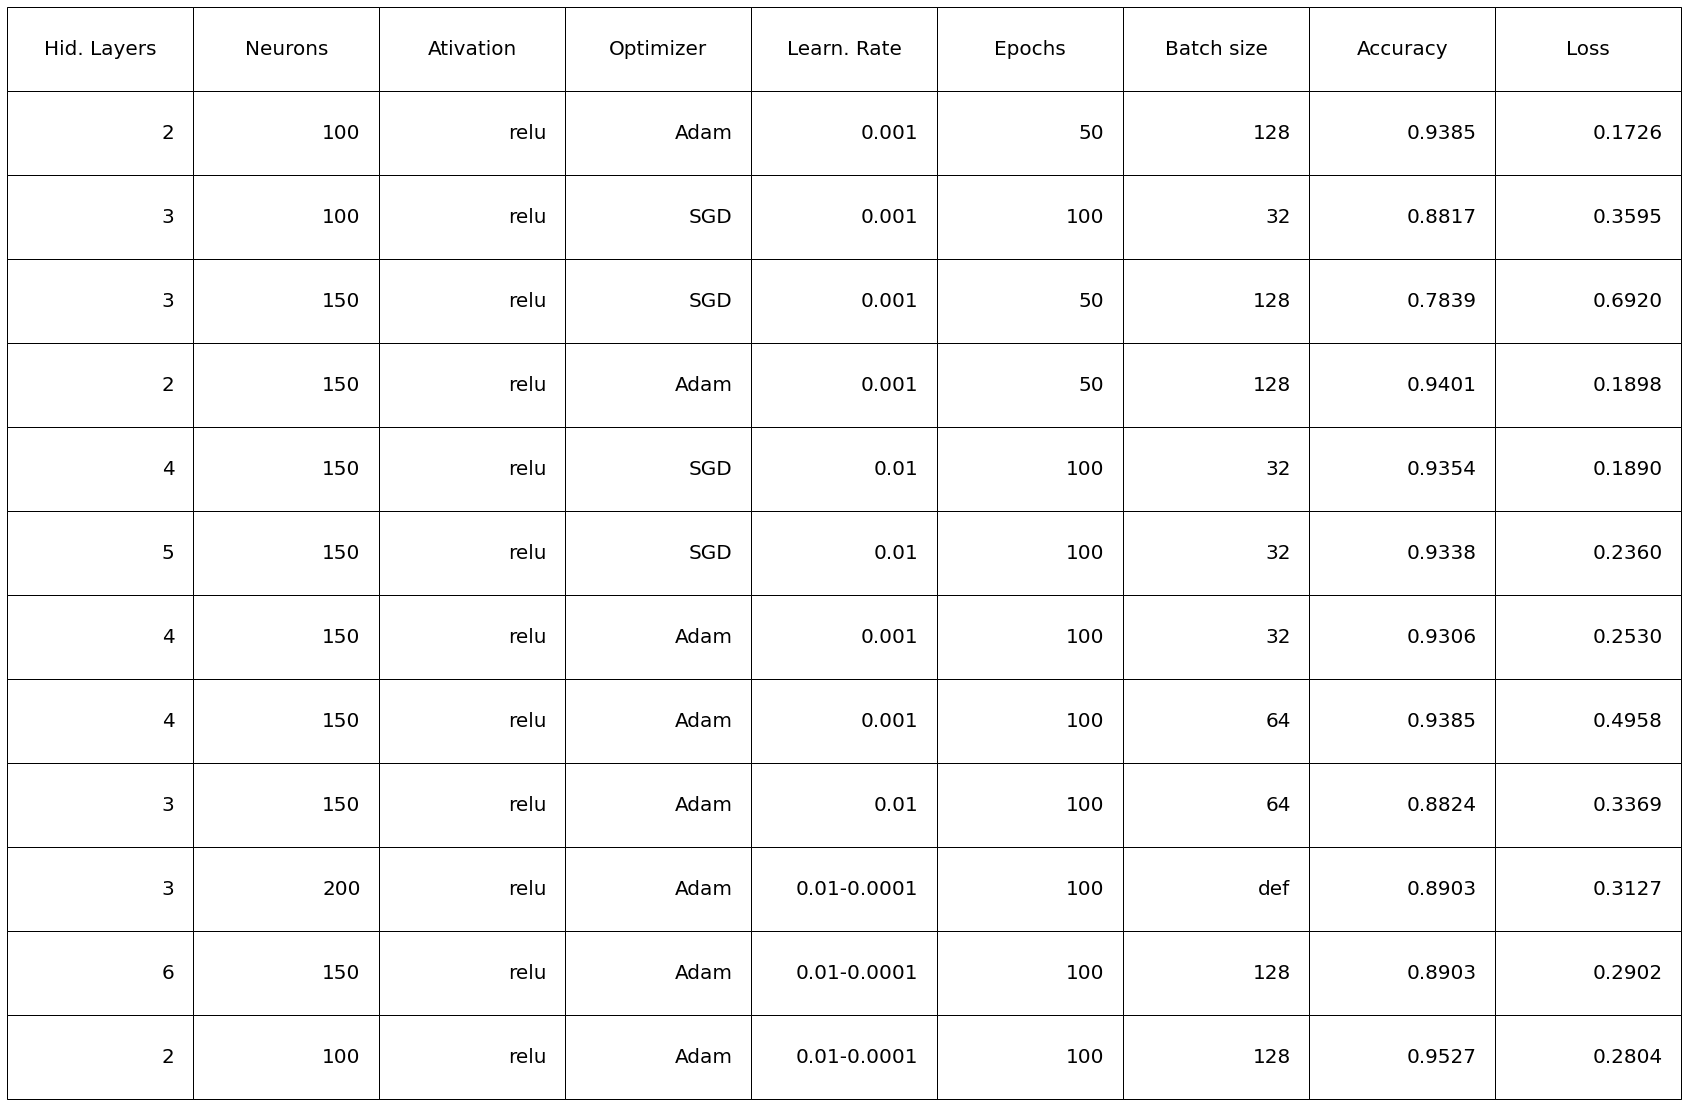

In [230]:
labels = ['Hid. Layers', 'Neurons', 'Ativation', 'Optimizer',
          'Learn. Rate', 'Epochs', 'Batch size', 'Accuracy', 'Loss']

data = [['2', '100', 'relu', 'Adam', '0.001', '50', '128', '0.9385', '0.1726'],
        ['3', '100', 'relu',  'SGD', '0.001','100',  '32', '0.8817', '0.3595'],
        ['3', '150', 'relu',  'SGD', '0.001', '50', '128', '0.7839', '0.6920'],
        ['2', '150', 'relu', 'Adam', '0.001', '50', '128', '0.9401', '0.1898'],
        ['4', '150', 'relu',  'SGD',  '0.01','100',  '32', '0.9354', '0.1890'],
        ['5', '150', 'relu',  'SGD',  '0.01','100',  '32', '0.9338', '0.2360'],
        ['4', '150', 'relu', 'Adam', '0.001','100',  '32', '0.9306', '0.2530'],
        ['4', '150', 'relu', 'Adam', '0.001','100',  '64', '0.9385', '0.4958'],
        ['3', '150', 'relu', 'Adam', '0.01', '100',  '64', '0.8824', '0.3369'],
        ['3', '200', 'relu', 'Adam', '0.01-0.0001','100',  'def', '0.8903', '0.3127'],
        ['6', '150', 'relu', 'Adam', '0.01-0.0001','100',  '128', '0.8903', '0.2902'],
        ['2', '100', 'relu', 'Adam', '0.01-0.0001','100',  '128', '0.9527', '0.2804']]

data = np.array(data)
fig, ax = plt.subplots()
table = ax.table(cellText=data, colLabels=labels, loc='center')
table.set_fontsize(20)
table.scale(5,7)
ax.axis('off')
ax.grid(False)

plt.show()

# **2.5 Σχεδιασμός αρχιτεκτονικής νευρωνικού δικτύου**

Δημιουργούμε ένα **ΤΝΔ** με **4 κρυφά επίπεδα 100 νευρώνων**, με συνάρτηση ενεργοποίησης **ReLU**, **Adam optimizer** με **ρυθμό εκμάθησης 0.001** και **100 εποχές εκπαίδευσης**.

Θα δούμε πως πετυχαίνει **χαμηλότερο accuraty** και **υψηλότερο loss** από το νευρωνικό που υλοποιήσαμε πιο πάνω, επειδή έχει 2 hidden layers παραπάνω, και σταθερό learning rate.

In [231]:
def run_tf_NN(X_train, X_test, y_train, y_test):

  model = keras.Sequential([
      layers.Input(shape=(X_train.shape[1],), name='input'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(3, activation='softmax', name='output')      
  ])

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )
  model.summary()
  history = model.fit(X_train, y_train, epochs=100, batch_size = 128)
  accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  tf_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx)

  return accuracy, tf_confmatrix

In [241]:
accuracy, tf_confmatrix = run_tf_NN(X_train, X_test, y_train, y_test)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_153 (Dense)           (None, 100)               2200      
                                                                 
 dense_154 (Dense)           (None, 100)               10100     
                                                                 
 dense_155 (Dense)           (None, 100)               10100     
                                                                 
 dense_156 (Dense)           (None, 100)               10100     
                                                                 
 output (Dense)              (None, 3)                 303       
                                                                 
Total params: 32,803
Trainable params: 32,803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================

## **Model evaluation on test set**
Το μοντέλο μας σημειώνει ένα πολύ ικανοποιητικό **accuracy** στο **test set   ~94.5%**

Test loss: 0.3887
Test accuracy: 0.9448



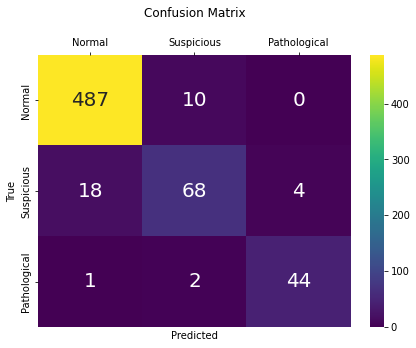

In [243]:
print(f'Test loss: {accuracy[0]:.4f}')
print(f'Test accuracy: {accuracy[1]:.4f}\n')
heat_confmatrix(tf_confmatrix.numpy())

# **2.6 Random Forest Classification**

Με τη χρήση του μοντέλου **Random Forest** πετυχαίνουμε **accuracy ~0.960**

Είναι αρκετά καλύτερο απ τα γραμμικά μοντέλα που χρησιμοποιήσαμε προηγουμένως, με την έννοια ότι εμφάνισε καλύτερο accuracy και η εκπαίδευση του έγινε υπερβολικά πιο γρήγορα, σε αντίθεση με τα μοντέλα νευρωνικών δικτύων που εκπαιδεύσαμε πιο πάνω. Παρατηρούμε λοιπόν ότι το **Random Forest** είναι πιο αποδοτικό σε προβλήματα **κατηγοριοποίησης**, ειδικά τώρα που έχουμε μόνο **2113 δείγματα**.

Σημ: Με μόνο 5 γραμμές κώδικα.

Accuracy: 0.9574



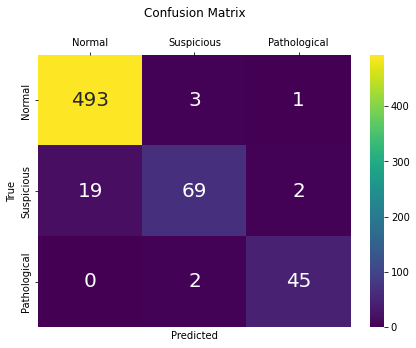

In [239]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
confmatrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')
heat_confmatrix(confmatrix)